<a href="https://colab.research.google.com/github/Akintoyeai/Machine_learning/blob/main/kMeans_for_image_color_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Compression using K-Means Clustering**

Image compression is a sort of data compression that is done to digital imagery without compromising the image's quality.

Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from skimage import io
from sklearn.cluster import MiniBatchKMeans
from PIL import Image


In [2]:
# Fix NumPy issues.
import warnings; warnings.simplefilter('ignore')  

In [3]:
#Load Image.
org_image = io.imread('Park Güell.png')


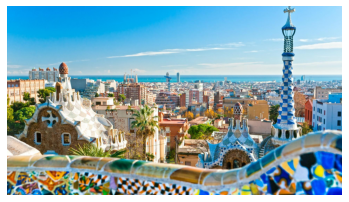

In [4]:
 #Show image to be compressed 
 image = plt.imread('Park Güell.png')
 plt.axis('off')
 plt.imshow(image)

In [5]:
#Getting dimesions to be used when flattening 
length = org_image.shape[0] 
width = org_image.shape[1]
RGB = org_image.shape[2]
print ("Length of the image is" +" "+ str(org_image.shape[0]))
print ("Width of the image is"+" "+ str(org_image.shape[1]))


Length of the image is 1080
Width of the image is 1920


The image itself is stored in a three-dimensional array of size (height, width, RGB), containing red/blue/green contributions as integers from 0 to 256.
It is then normalized within the range of 0 to 1 to reduce complexity by dividing by 255 and flattened afterwards 

In [6]:
#Normalization
data = org_image / 255.0
#Flattening
data = data.reshape(length * width, RGB)
data.shape

(2073600, 3)

We can visualize these pixels in this color space, using a subset of 10,000 pixels for
efficiency

In [7]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);
    

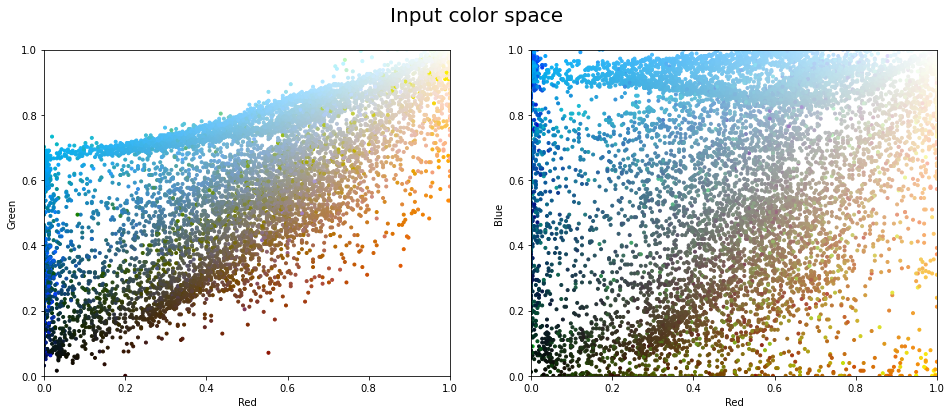

In [8]:
plot_pixels(data, title='Input color space')

## Kmeans clustering

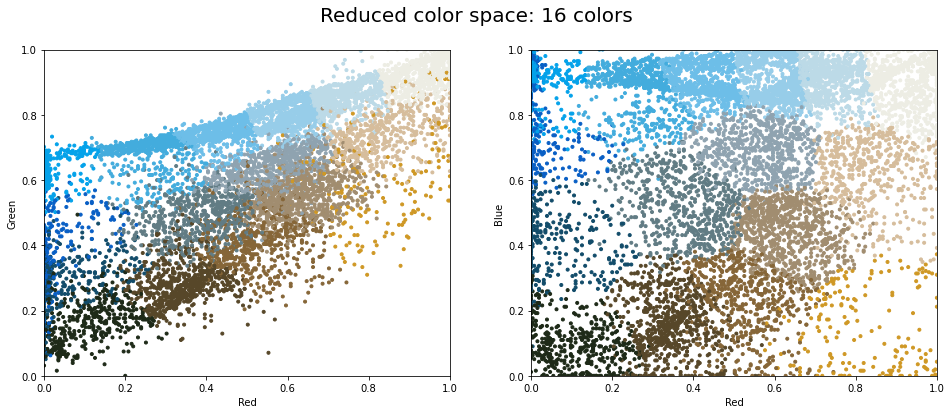

In [9]:
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

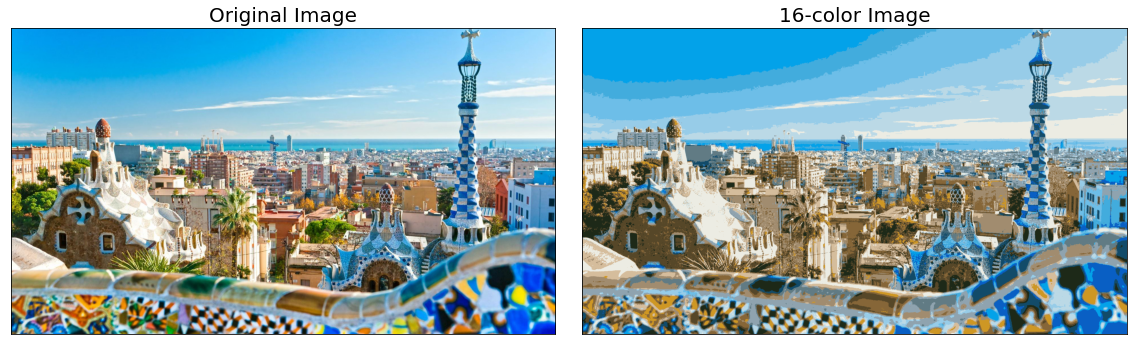

In [10]:
image_recolored = new_colors.reshape(org_image.shape)

fig, ax = plt.subplots(1, 2, figsize=(20, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(org_image)
ax[0].set_title('Original Image', size=20)
ax[1].imshow(image_recolored)
ax[1].set_title('16-color Image', size=20);

In [11]:
image_recolored.shape

(1080, 1920, 3)

In [12]:
#The number of pixels doesn't change from the original image
org_image.shape

(1080, 1920, 3)

In [13]:
#Save and display output image
io.imsave('image_recolored.png', image_recolored)


In [14]:
def total_col (image_path):
  img = Image.open(image_path)
  uniqueColors = set()
  
  w, h = img.size
  for x in range(w):
      for y in range(h):
          pixel = img.getpixel((x, y))
          uniqueColors.add(pixel)
  
  totalUniqueColors = len(uniqueColors)
  
  print(totalUniqueColors)

In [15]:
#Total number of unique colors in the original image
total_col('Park Güell.png')

505683


In [16]:
#Total number of unique colors in the conpressed image
total_col('image_recolored.png')

16


In [17]:
#Size of the original image
os.path.getsize('Park Güell.png')

2579226

In [18]:
#Size of the compressed image
os.path.getsize('image_recolored.png')

486907

More photos may be saved in a given amount of disk or memory space because to the smaller file size. It also cuts down on the time it takes to send photos over the Internet or download them from web sites.